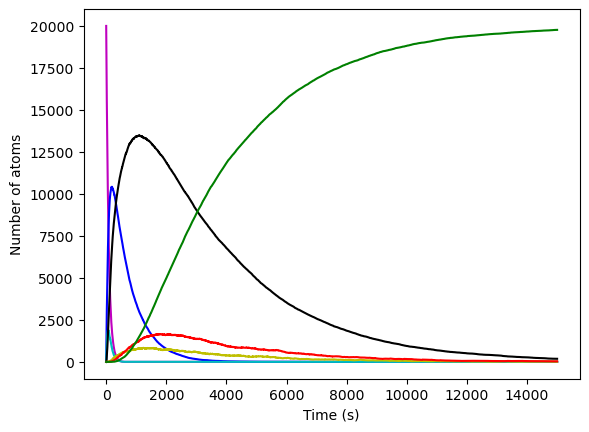

Alpha decay = 166075 MeV
R decay = 102571 MeV
Beta decay = 22463.0 MeV
Z decay = 59670 MeV
Total Energy = 350779.0 MeV


In [238]:
import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show
result = []
def main(success):
    NAt = 20000
    NBi = 0
    NRn = 0               
    NPb = 0
    NBi11 = 0
    NTl = 0
    NPb07 = 0

    h = 1

    TauAt = 56
    TauBi = 7.6 * 60
    TauRn = 40               
    TauPb = 36.1 * 60
    TauBi11 = 2.14 * 60
    TauTl = 4.77 * 60



    PAt = 1 - (2**(-h/TauAt))
    PBi = 1 - (2**(-h/TauBi))
    PRn = 1 - (2**(-h/TauRn))               
    PPb = 1 - (2**(-h/TauPb))
    PBi11 = 1 - (2**(-h/TauBi11))
    PTl = 1 - (2**(-h/TauTl))

    tmax = 15000

    tpoints = arange(0.0,tmax,h) 

    NAtpoints = [] 
    NBipoints = [] 
    NRnpoints = []
    NPbpoints = []
    NBi11points = [] 
    NTlpoints = []
    NPb07points = []

    a_decay = 0
    r_decay = 0
    b_decay = 0
    z_decay = 0

    for t in tpoints:
        NAtpoints.append(NAt)
        NBipoints.append(NBi) 
        NRnpoints.append(NRn)
        NPbpoints.append(NPb)
        NBi11points.append(NBi11) 
        NTlpoints.append(NTl) 
        NPb07points.append(NPb07)


        decayTl = 0
        for i in range(NTl):
            if np.random.random() < PTl:
                decayTl += 1
                b_decay += 0.5
        NTl -= decayTl
        NPb07 += decayTl


        decay_Bi11_Tl = 0
        decay_Bi11_Pb07 = 0
        for i in range(NBi11):
            if np.random.random() < PBi11:
                if np.random.random() <= 0.97:
                    decay_Bi11_Tl += 1
                    a_decay += 5
                else:
                    decay_Bi11_Pb07 += 1
                    r_decay += 7      
        NBi11 -= decay_Bi11_Tl
        NBi11 -= decay_Bi11_Pb07
        NTl += decay_Bi11_Tl
        NPb07 += decay_Bi11_Pb07


        decayPb = 0
        for i in range(NPb):
            if np.random.random() < PPb:
                decayPb += 1
                b_decay += 0.5
        NPb -= decayPb
        NBi11 += decayPb



        decayAt_Bi = 0
        decayAt_Rn = 0
        for i in range(NAt):
            if np.random.random() < PAt:
                if np.random.random() <= 0.3:
                    decayAt_Rn += 1
                    b_decay += 0.5
                else:
                    decayAt_Bi += 1
                    a_decay += 5
        NAt -= decayAt_Bi
        NAt -= decayAt_Rn
        NBi += decayAt_Bi
        NRn += decayAt_Rn

        decayRn = 0
        for i in range(NRn):
            if np.random.random() < PRn:
                decayRn += 1
                z_decay += 10
        NRn -= decayRn
        NPb += decayRn

        decayBi = 0
        for i in range(NBi):
            if np.random.random() < PBi:
                decayBi += 1
                r_decay += 7
        NBi -= decayBi
        NPb += decayBi



    if(success):
        plot(tpoints,NAtpoints, c='m') 
        plot(tpoints,NBipoints, c='b') 
        plot(tpoints,NRnpoints, c='c') 
        plot(tpoints,NPbpoints, c='k') 
        plot(tpoints,NBi11points, c='y') 
        plot(tpoints,NTlpoints, c='r') 
        plot(tpoints,NPb07points, c='g') 



        xlabel("Time (s)")
        ylabel("Number of atoms")
        show()


    
    result.append(a_decay)
    result.append(r_decay)
    result.append(b_decay)
    result.append(z_decay)
    
    
    return result
    
main(True)

print("Alpha decay =", result[0], "MeV")
print("R decay =",result[1],"MeV")  
print("Beta decay =",result[2],"MeV")  
print("Z decay =",result[3],"MeV")
sum = result[0] + result[1] + result[2] + result[3]
print("Total Energy =", sum, "MeV")    

In [239]:
#AVERAGE

Energy = []    
for i in range(10):
    Energy.extend(main(False))
    
sum1 = 0
for i in range(0, len(Energy)):
    sum1 += Energy[i]

num = len(Energy)
avg = sum1/num
print(f"The average of the total decay energies produced is: {avg:.3f} MeV")


#STANDARD DEVIATION
arr_version = np.array(Energy)
top = (arr_version - avg)**2
sum2 = 0
for i in range(0, len(top)):
    sum2 += top[i]
std = np.sqrt((sum2) / (len(top) - 1))
print(f"The Standard Deviation of the total decay energies produced is: {std:.3f} MeV")




The average of the total decay energies produced is: 87651.687 MeV
The Standard Deviation of the total decay energies produced is: 53319.411 MeV


In [240]:
a_decay_energy = Energy[::4]
r_decay_energy = Energy[1::4]
b_decay_energy = Energy[2::4]
z_decay_energy = Energy[3::4]



#AVERAGE
sum1 = 0
for i in range(0, len(a_decay_energy)):
    sum1 += a_decay_energy[i]

num = len(a_decay_energy)
avg_a = sum1/num
print(f"The average of the Alpha decay energies produced is: {avg_a:.3f} MeV")


#STANDARD DEVIATION
arr_version = np.array(a_decay_energy)
top = (arr_version - avg_a)**2
sum2 = 0
for i in range(0, len(top)):
    sum2 += top[i]
std_a = np.sqrt((sum2) / (len(top) - 1))
print(f"The Standard Deviation of the Alpha decay energies produced is: {std_a:.3f} MeV\n")



#AVERAGE
sum1 = 0
for i in range(0, len(r_decay_energy)):
    sum1 +=r_decay_energy[i]

num = len(r_decay_energy)
avg = sum1/num
print(f"The average of the R decay energies produced is: {avg:.3f} MeV")


#STANDARD DEVIATION
arr_version = np.array(r_decay_energy)
top = (arr_version - avg)**2
sum2 = 0
for i in range(0, len(top)):
    sum2 += top[i]
std = np.sqrt((sum2) / (len(top) - 1))
print(f"The Standard Deviation of the R decay energies produced is: {std:.3f} MeV\n")





#AVERAGE
sum1 = 0
for i in range(0, len(b_decay_energy)):
    sum1 +=b_decay_energy[i]

num = len(b_decay_energy)
avg = sum1/num
print(f"The average of the B decay energies produced is: {avg:.3f} MeV")


#STANDARD DEVIATION
arr_version = np.array(b_decay_energy)
top = (arr_version - avg)**2
sum2 = 0
for i in range(0, len(top)):
    sum2 += top[i]
std = np.sqrt((sum2) / (len(top) - 1))
print(f"The Standard Deviation of the B decay energies produced is: {std:.3f} MeV\n")





#AVERAGE
sum1 = 0
for i in range(0, len(z_decay_energy)):
    sum1 +=z_decay_energy[i]

num = len(z_decay_energy)
avg = sum1/num
print(f"The average of the Z decay energies produced is: {avg:.3f} MeV")


#STANDARD DEVIATION
arr_version = np.array(z_decay_energy)
top = (arr_version - avg)**2
sum2 = 0
for i in range(0, len(top)):
    sum2 += top[i]
std = np.sqrt((sum2) / (len(top) - 1))
print(f"The Standard Deviation of the Z decay energies produced is: {std:.3f} MeV")

The average of the Alpha decay energies produced is: 165841.385 MeV
The Standard Deviation of the Alpha decay energies produced is: 295.269 MeV

The average of the R decay energies produced is: 102140.446 MeV
The Standard Deviation of the R decay energies produced is: 563.904 MeV

The average of the B decay energies produced is: 22483.531 MeV
The Standard Deviation of the B decay energies produced is: 41.779 MeV

The average of the Z decay energies produced is: 60141.385 MeV
The Standard Deviation of the Z decay energies produced is: 669.680 MeV


In [241]:
sigma = 3 * std_a + avg_a
thickness = sigma / 2200
print(f"To safely block {sigma:.3f} MeV of Alpha decay energy, we need a {thickness:.3f} cm thick shield.")

To safely block 166727.193 MeV of Alpha decay energy, we need a 75.785 cm thick shield.
